In [28]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import seaborn as sns

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


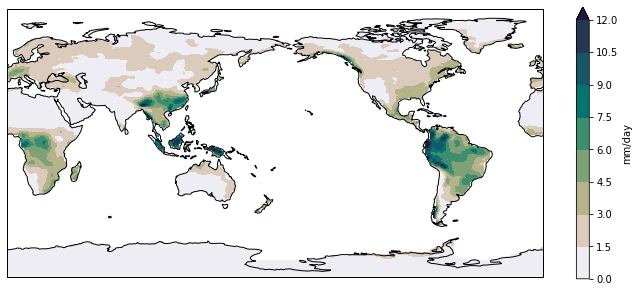

In [14]:
pr_file = '/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p1f1/Amon/pr/gn/v20191112/pr_Amon_ACCESS-CM2_piControl_r1i1p1f1_gn_095001-144912.nc'
sftlf_file = '/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p1f1/fx/sftlf/gn/v20191112/sftlf_fx_ACCESS-CM2_piControl_r1i1p1f1_gn.nc'

dset_pr = xr.open_dataset(pr_file)
dset_sftlf = xr.open_dataset(sftlf_file)

clim_pr = dset_pr.pr[0:12, ::].mean('time', keep_attrs=True)
clim_pr.data = clim_pr.data * 86400
clim_pr.attrs['units'] = 'mm/day'

clim_pr_land = clim_pr.where(dset_sftlf.sftlf.data > 50)

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim_pr_land.plot.contourf(ax=ax,
                           levels=np.arange(0, 13.5, 1.5),
                           extend='max',
                           transform=ccrs.PlateCarree(),
                           cbar_kwargs={'label': clim_pr.units},
                           cmap=cmocean.cm.rain)
ax.coastlines()
plt.show()

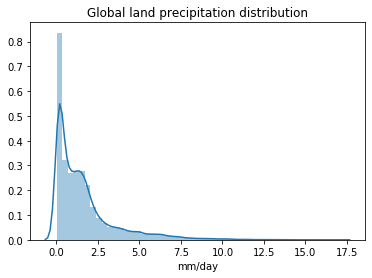

In [35]:
pr_data = clim_pr_land.data[np.logical_not(np.isnan(clim_pr_land.data))]
sns.distplot(pr_data)
plt.title('Global land precipitation distribution')
plt.xlabel('mm/day')
plt.show()

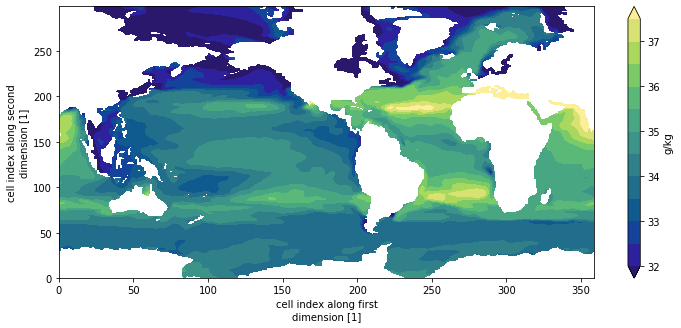

In [24]:
sos_file = '/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p1f1/Omon/sos/gn/v20191112/sos_Omon_ACCESS-CM2_piControl_r1i1p1f1_gn_095001-144912.nc'
dset_sos = xr.open_dataset(sos_file)
clim_sos = dset_sos.sos[0:12, ::].mean('time', keep_attrs=True)
fig = plt.figure(figsize=[12,5])
clim_sos.plot.contourf(cbar_kwargs={'label': 'g/kg'},
                       levels=np.arange(32, 38, 0.5),
                       cmap=cmocean.cm.haline)
plt.show()

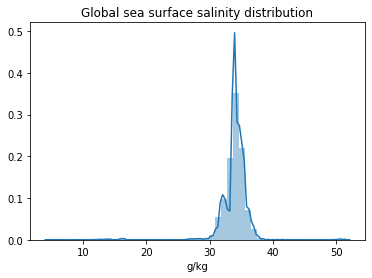

In [37]:
sos_data = clim_sos.data[np.logical_not(np.isnan(clim_sos.data))]
sns.distplot(sos_data)
plt.title('Global sea surface salinity distribution')
plt.xlabel('g/kg')
plt.show()